<a href="https://colab.research.google.com/github/zuzannazak/random-files-i-need-sometimes/blob/main/MonteCarlo_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wstęp:

Ostatnie lata były najcieplejszymi latami w historii, kiedy to ocieplenie było w dużej mierze napędzane przez zwiększoną emisję dwutlenku węgla i innych gazów cieplarnianych do atmosfery. Zmiany klimatyczne są również widoczne w ocieplających się temperaturach powierzchni oceanów, a także w zasięgu lodu morskiego na półkuli północnej, który zwykle osiąga swój szczyt w grudniu. Dynamika pogody może wpływać na temperatury regionalne, a tym samym poziom ocieplenia może się różnić na całym świecie. Na przykład, trendy ocieplenia są najbardziej widoczne w regionie Arktyki, przy ciągłej utracie lodu morskiego.

Anomalie temperatury dostarczają informacje o różnicy w stosunku do średniej lub temperatury bazowej. Anomalie dodatnie wskazują, że obserwowana temperatura była wyższa niż wartość wyjściowa, natomiast anomalia ujemna wskazuje, że obserwowana temperatura była niższa niż wyjściowa. Od lat 80. roczna zmiana temperatury w stosunku do XX wieku jest niezmiennie dodatnia. W 2020 roku anomalia temperatury powierzchni lądu i oceanu wyniosła 0,98 stopnia Celsjusza. Anomalie temperatury są generalnie ważniejsze w badaniu zmian klimatu niż temperatura bezwzględna. Dzieje się tak, ponieważ podczas obliczania średnich temperatur bezwzględnych czynniki, takie jak lokalizacja stacji i wysokość, mogą mieć krytyczny wpływ na temperatury bezwzględne, ale mają mniejsze znaczenie w obliczeniach anomalii.

#Zbiór danych:

Dane dotyczą zmiany globalnej temperatury wody w stosunku do średnich temperatur lądu z lat 1880-2020. Dane oparte są na Globalnym wskaźniku temperatury lądu i oceanu

Globalny wskaźnik temperatury lądu i oceanu (NASA) (Land-Ocean Temperature Index)
Roczne globalne anomalie temperatury (lądów i oceanów) - NASA 
GLOBALNY wskaźnik temperatury ląd-ocean w 0,01 stopnia Celsjusza 
Globalne dane o temperaturze z National Aeronautics and Space Administration (NASA) Goddard Institute for Space Studies NASA – Goddard Institute (laboratorium w Wydziale Nauk o Ziemi Goddard Space Flight Center NASA, stowarzyszonym z Columbia University Earth Institute) dla Badań analizy temperatury powierzchni przestrzeni (GISTEMP)

#Opis zmiennych  :

Year - rok zebrania obserwacji
No_Smoothing - globalny wskaźnik różnicy temperatury lądu i oceanu bez wygładzenia 
Lowess(5)- globalny wskaźnik różnicy temperatury lądu i oceanu wygładzony metodą LOWESS*

W naszym badaniu wykorzystujemy zmienne Year i No_Smoothing
 


## Wczytanie danych

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("data.table")
install.packages("ggplot2")
install.packages("forecast")
install.packages("TSA")
library(forecast)
library(TSA)
library(data.table)
library(ggplot2)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5303849 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [ ]:
%%R
#datasource: https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
dane <- read.csv(url("https://raw.githubusercontent.com/zuzannazak/random-files-i-need-sometimes/main/dane.csv"), header=TRUE, sep = ";")
dane

    Year No_Smoothing Lowess.5.
1   1880        -0.17     -0.09
2   1881        -0.08     -0.13
3   1882        -0.10     -0.16
4   1883        -0.17     -0.20
5   1884        -0.28     -0.23
6   1885        -0.33     -0.26
7   1886        -0.31     -0.27
8   1887        -0.36     -0.27
9   1888        -0.17     -0.26
10  1889        -0.10     -0.25
11  1890        -0.35     -0.25
12  1891        -0.22     -0.25
13  1892        -0.27     -0.26
14  1893        -0.31     -0.26
15  1894        -0.30     -0.24
16  1895        -0.22     -0.22
17  1896        -0.11     -0.20
18  1897        -0.11     -0.18
19  1898        -0.27     -0.16
20  1899        -0.17     -0.17
21  1900        -0.08     -0.20
22  1901        -0.16     -0.23
23  1902        -0.28     -0.26
24  1903        -0.37     -0.28
25  1904        -0.47     -0.31
26  1905        -0.26     -0.34
27  1906        -0.22     -0.36
28  1907        -0.39     -0.37
29  1908        -0.43     -0.39
30  1909        -0.48     -0.41
31  1910

Ten wykres ilustruje zmianę globalnej temperatury powierzchni w stosunku do średnich temperatur z lat 1951-1980. 
Dziewiętnaście najcieplejszych lat miało miejsce od 2000 r.,  z wyjątkiem 1998 r. 
Rok 2020 zrównał się z 2016 r. jako najcieplejszy rok w historii od rozpoczęcia prowadzenia ewidencji w 1880 r. (źródło: NASA/GISS). 

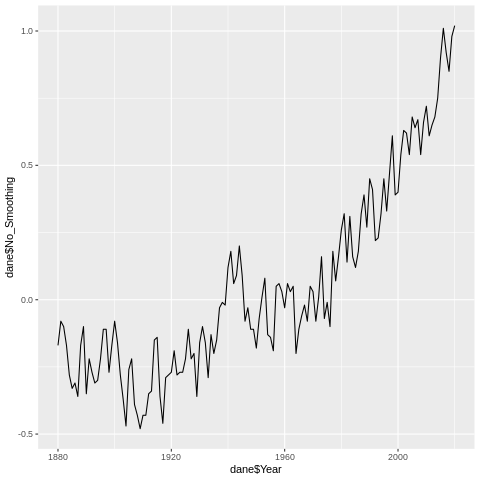

In [ ]:
%%R
#dane startowe
ggplot(dane, aes(x=dane$Year, y=dane$No_Smoothing)) +
  geom_line()

## Symulacja 1

Dopasowanie najlepszego modelu ARIMA do jednowymiarowego szeregu czasowego

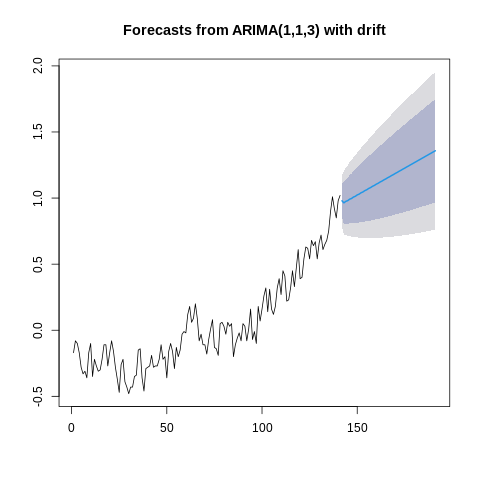

In [ ]:
%%R 
# fitting
fit <- auto.arima(dane$No_Smoothing)

# Time series plot
plot(fc <- forecast(fit, h = 50))

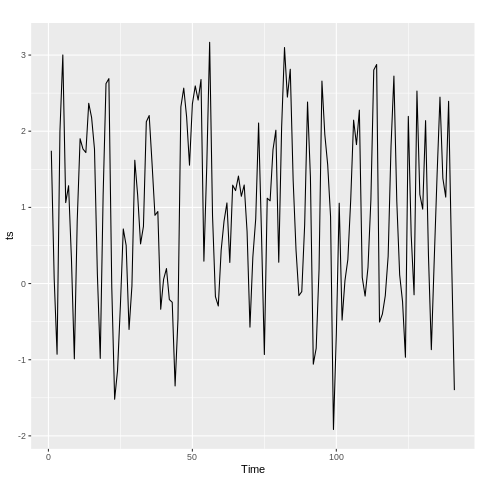

In [ ]:
%%R
set.seed(100000)
t <- dane$No_Smoothing
alpha <- 1
beta <- 0
theta <- 0.8
ts <- alpha + beta * t + arima.sim(list(ma = theta), n = length(t))
autoplot(ts)

## Symulacja

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
df = pd.read_csv("https://raw.githubusercontent.com/zuzannazak/random-files-i-need-sometimes/main/dane.csv", ';', usecols=[0,1])

In [ ]:
log_returns = np.log(1 + df['No_Smoothing'].pct_change())
u = log_returns.mean() #Mean of the logarithmic return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 300 
iterations = 15 #15 prób

yearly_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations))) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
S0 = df['No_Smoothing'].iloc[-1] #różnica temperatury końcowa (2020)
S0

1.02

In [ ]:
temp_diff_list = np.zeros_like(yearly_returns)
temp_diff_list[0] = S0
temp_diff_list

array([[1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
# predykcja
for t in range(1, t_intervals):
    temp_diff_list[t] = temp_diff_list[t - 1] * yearly_returns[t]
temp_diff_list = pd.DataFrame(temp_diff_list)
temp_diff_list['temp_diff'] = temp_diff_list[0]
temp_diff_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,temp_diff
0,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000
1,0.341489,1.160518,0.629073,0.534598,0.945868,0.898012,0.355933,4.356364,1.584564,1.299060,0.259152,2.716737,0.271046,1.228492,0.385930,0.341489
2,0.484311,2.126984,0.441536,0.301567,0.826900,1.725384,0.540012,2.010579,0.390459,0.879676,0.267332,2.611977,0.199004,1.991323,0.276899,0.484311
3,0.172744,3.540241,0.193831,0.164382,0.300460,0.475836,0.118065,1.875863,0.291095,0.957390,0.484741,0.832795,0.074491,4.790709,0.102404,0.172744
4,0.182692,0.834385,0.074019,0.584935,0.142461,1.224435,0.078227,0.880954,0.116492,0.547722,0.131170,0.718360,0.022513,6.090168,0.137141,0.182692


In [ ]:
temp_diff = df['No_Smoothing']
temp_diff = pd.DataFrame(temp_diff)
frames = [temp_diff, temp_diff_list]
monte_carlo_forecast = pd.concat(frames)

In [ ]:
monte_carlo_forecast.head()

,No_Smoothing,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,temp_diff
0,-0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
monte_carlo_forecast.tail()

,No_Smoothing,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,temp_diff
295,NaN,2.808313e-25,5.632707e-25,3.600754e-28,5.245843e-27,1.982870e-30,7.312385e-31,2.059699e-17,2.375532e-24,1.246477e-23,3.117344e-29,1.792348e-16,2.146422e-23,3.504848e-14,8.137303e-20,3.018339e-29,2.808313e-25
296,NaN,1.415606e-25,6.041921e-25,2.362009e-28,1.821213e-27,3.215859e-30,1.769443e-30,2.267519e-17,6.451985e-25,2.665058e-24,2.515996e-29,3.078831e-16,4.048748e-23,2.820658e-14,6.822389e-20,2.834011e-29,1.415606e-25
297,NaN,6.717413e-26,7.101640e-25,3.693948e-28,2.133002e-27,1.585483e-30,1.520361e-30,2.966858e-17,1.454525e-25,1.232031e-24,1.332433e-29,1.043280e-16,2.440357e-23,5.551198e-14,1.309407e-19,1.320661e-29,6.717413e-26
298,NaN,5.736037e-26,1.998188e-25,1.201856e-28,2.841543e-27,8.114555e-31,3.845366e-31,1.790236e-17,9.640633e-26,8.803783e-25,1.664442e-29,2.048103e-16,1.161452e-23,1.477239e-13,1.970193e-19,1.787860e-29,5.736037e-26
299,NaN,3.651136e-26,4.205039e-26,5.147986e-29,1.030031e-27,1.022107e-30,5.067399e-31,1.248495e-17,1.072930e-25,1.863653e-25,1.275706e-29,3.252181e-16,9.424832e-24,1.749015e-13,1.635871e-19,4.140117e-29,3.651136e-26


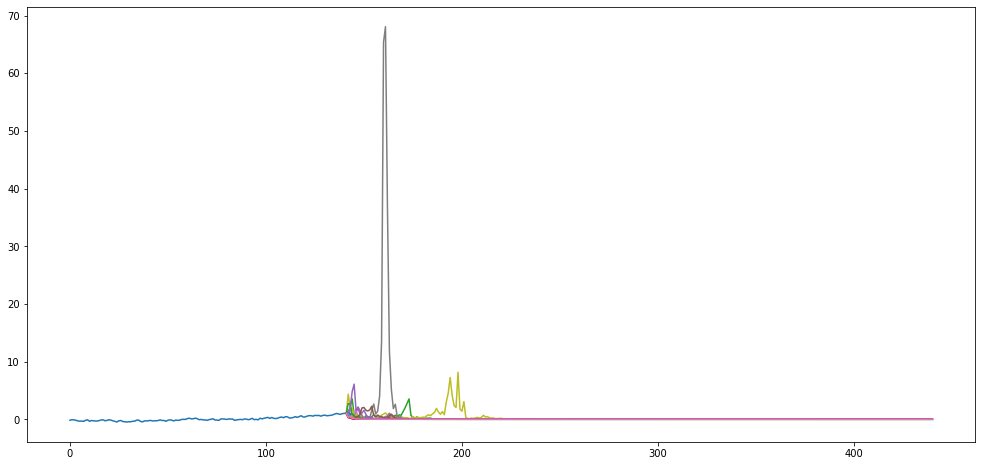

In [ ]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()

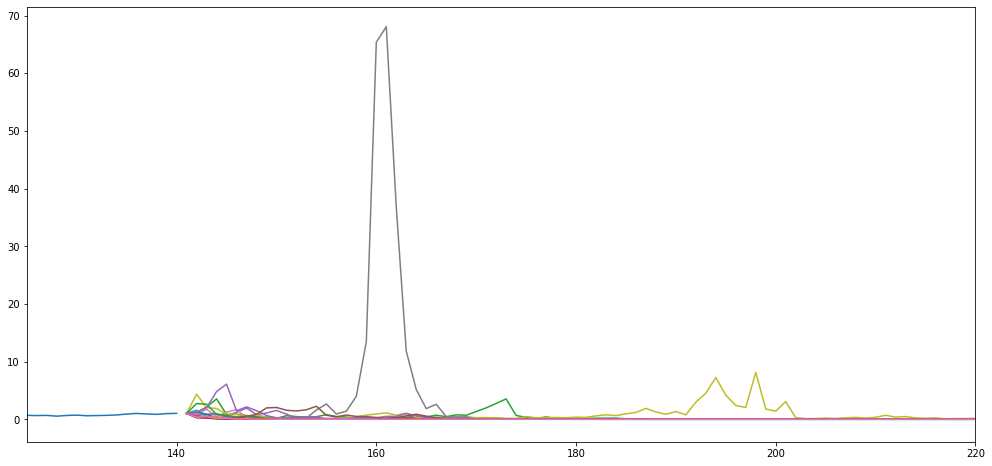

In [ ]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.xlim([125, 220])
plt.show()

## Źródła

*   https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
*   https://www.youtube.com/watch?v=_T0l015ecK4
*   https://www.kaggle.com/bturan19/financial-time-series-monte-carlo-simulation-arma

